In [1]:
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

In [3]:
project_root

'C:\\Users\\phatl\\OneDrive - VNU-HCMUS\\Desktop\\TransUNet_Segmentation_In_Medical_Image'

In [4]:
def check_training_shapes(train_dir):
    train_files = sorted([f for f in os.listdir(train_dir) if f.endswith('.npz')])
    print("Đang kiểm tra các file training (số files: {}):".format(len(train_files)))
    for f in train_files:
        file_path = os.path.join(train_dir, f)
        data = np.load(file_path)
        image = data['image']
        label = data['label']
        print(f"File: {f} => Image shape: {image.shape}, Label shape: {label.shape}")

In [5]:
def check_testing_shapes(test_dir):
    test_files = sorted([f for f in os.listdir(test_dir) if f.endswith('.npy.h5')])
    print("Đang kiểm tra các file testing (số files: {}):".format(len(test_files)))
    for f in test_files:
        file_path = os.path.join(test_dir, f)
        with h5py.File(file_path, "r") as hf:
            image = hf['image'][:]
        print (f"File: {f} => Voulume shape: {image.shape}")

In [10]:
processed_train_dir = os.path.join(project_root, "data_test", "synapse", "train")
processed_test_dir = os.path.join(project_root, "data_test", "synapse", "test")

In [11]:
print("=== Kiểm tra shape của tập TRAINING ===")
check_training_shapes(processed_train_dir)

=== Kiểm tra shape của tập TRAINING ===
Đang kiểm tra các file training (số files: 2211):
File: case0005_slice000.npz => Image shape: (512, 512), Label shape: (512, 512)
File: case0005_slice001.npz => Image shape: (512, 512), Label shape: (512, 512)
File: case0005_slice002.npz => Image shape: (512, 512), Label shape: (512, 512)
File: case0005_slice003.npz => Image shape: (512, 512), Label shape: (512, 512)
File: case0005_slice004.npz => Image shape: (512, 512), Label shape: (512, 512)
File: case0005_slice005.npz => Image shape: (512, 512), Label shape: (512, 512)
File: case0005_slice006.npz => Image shape: (512, 512), Label shape: (512, 512)
File: case0005_slice007.npz => Image shape: (512, 512), Label shape: (512, 512)
File: case0005_slice008.npz => Image shape: (512, 512), Label shape: (512, 512)
File: case0005_slice009.npz => Image shape: (512, 512), Label shape: (512, 512)
File: case0005_slice010.npz => Image shape: (512, 512), Label shape: (512, 512)
File: case0005_slice011.npz =>

In [12]:
print("\n=== Kiểm tra shape của tập TESTING ===")
check_testing_shapes(processed_test_dir)


=== Kiểm tra shape của tập TESTING ===
Đang kiểm tra các file testing (số files: 12):
File: case0001.npy.h5 => Voulume shape: (147, 512, 512)
File: case0002.npy.h5 => Voulume shape: (139, 512, 512)
File: case0003.npy.h5 => Voulume shape: (198, 512, 512)
File: case0004.npy.h5 => Voulume shape: (140, 512, 512)
File: case0008.npy.h5 => Voulume shape: (148, 512, 512)
File: case0022.npy.h5 => Voulume shape: (89, 512, 512)
File: case0025.npy.h5 => Voulume shape: (85, 512, 512)
File: case0029.npy.h5 => Voulume shape: (100, 512, 512)
File: case0032.npy.h5 => Voulume shape: (144, 512, 512)
File: case0035.npy.h5 => Voulume shape: (94, 512, 512)
File: case0036.npy.h5 => Voulume shape: (184, 512, 512)
File: case0038.npy.h5 => Voulume shape: (100, 512, 512)


In [22]:
file_path = os.path.join(processed_train_dir, "case0005_slice016.npz")

# Load file .npz
data = np.load(file_path)

# Lấy ảnh và nhãn từ file, mỗi key chứa một mảng numpy riêng
image = data["image"]
label = data["label"]

print("Image shape:", image.shape)
print("Label shape:", label.shape)


Image shape: (512, 512)
Label shape: (512, 512)


In [23]:
def display_training_sample(file_path):
    """
    Hiển thị ảnh training và ảnh label tương ứng từ file .npz.

    Parameters:
        file_path (str): Đường dẫn đến file .npz chứa ảnh và label.
    """
    # Load file .npz
    data = np.load(file_path)

    # Lấy ảnh và nhãn từ file
    image = data["image"]
    label = data["label"]

    # Kiểm tra kích thước
    print("Image shape:", image.shape)
    print("Label shape:", label.shape)

    # Hiển thị ảnh
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(image, cmap="gray")
    axes[0].set_title("Training Image")
    axes[0].axis("off")

    axes[1].imshow(label, cmap="jet", alpha=0.7)
    axes[1].set_title("Label Mask")
    axes[1].axis("off")

    plt.show()

Image shape: (512, 512)
Label shape: (512, 512)


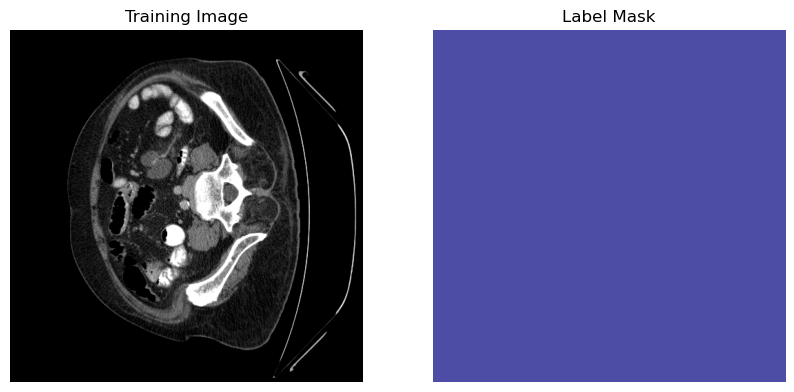

In [24]:
display_training_sample(file_path)

In [25]:
def display_volume(file_path, slice_indices=None):
    """
    Load volume từ file .h5 và hiển thị các slice cho image và label (nếu có).

    Args:
        file_path (str): Đường dẫn đến file .h5.
        slice_indices (list, optional): Danh sách index các slice muốn hiển thị.
                                        Nếu None, sẽ chọn slice đầu, giữa, và cuối.
    """
    with h5py.File(file_path, 'r') as hf:
        image = hf['image'][:]  # shape: (H, W, D)
        # Nếu có dataset 'label', load label, ngược lại tạo mảng zeros.
        label = hf['label'][:] if 'label' in hf else np.zeros_like(image)

    num_slices = image.shape[2]
    if slice_indices is None:
        slice_indices = [0, num_slices // 2, num_slices - 1]

    n_rows = len(slice_indices)
    n_cols = 2  # 1 cột cho image, 1 cột cho label

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 4 * n_rows))
    if n_rows == 1:
        axes = np.expand_dims(axes, axis=0)

    for i, idx in enumerate(slice_indices):
        # Hiển thị image slice
        axes[i, 0].imshow(image[:, :, idx], cmap='gray')
        axes[i, 0].set_title(f"Image slice {idx}")
        axes[i, 0].axis('off')
        # Hiển thị label slice
        axes[i, 1].imshow(label[:, :, idx], cmap='gray')
        axes[i, 1].set_title(f"Label slice {idx}")
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

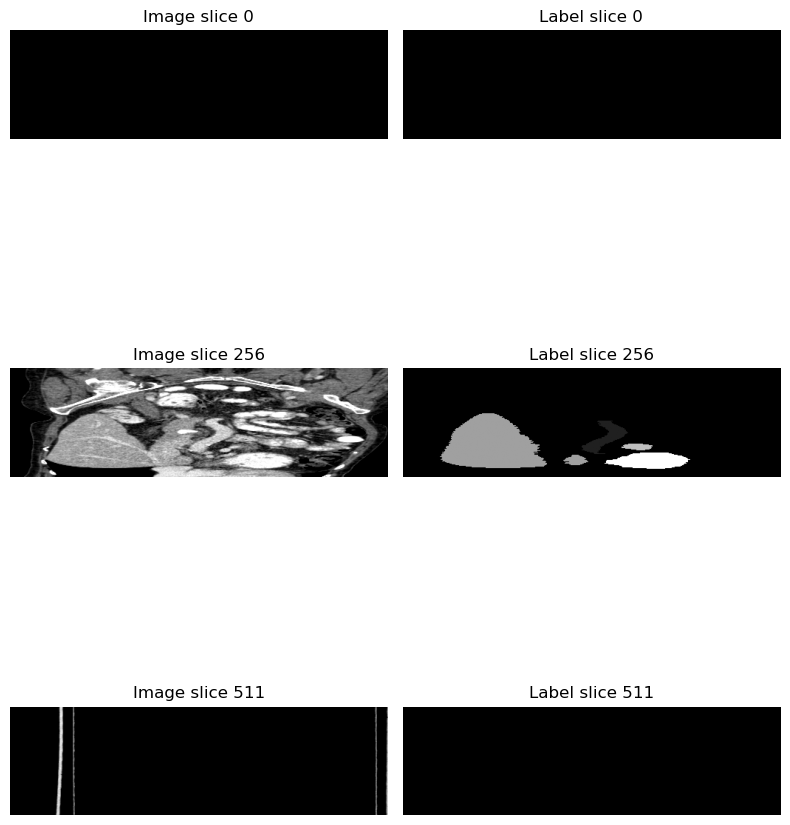

In [26]:
test_file_path = os.path.join(processed_test_dir, "case0001.npy.h5")
display_volume(test_file_path)

In [ ]:
import torch
print(torch.cuda.is_available())  # Nếu True là OK
print(torch.version.cuda)  # Phải ra 12.7
# print(torch.cuda.get_device_name(0))  # NVIDIA GeForce RTX 3050